In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("E:\Machine Learning\Fish-weight-prediction\Fish.csv")

In [3]:
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [4]:
df.shape

(159, 7)

In [5]:
df.isnull().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

In [6]:
df['Species'].unique()

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

In [13]:
x=df.drop(["Species","Length1","Length2","Length3","Weight"],axis=1)
x

,Height,Width
0,11.5200,4.0200
1,12.4800,4.3056
2,12.3778,4.6961
3,12.7300,4.4555
4,12.4440,5.1340
...,...,...
154,2.0904,1.3936
155,2.4300,1.2690
156,2.2770,1.2558
157,2.8728,2.0672


In [14]:
y=df.drop(["Species","Length1","Length2","Length3","Width","Height"],axis=1)
y

,Weight
0,242.0
1,290.0
2,340.0
3,363.0
4,430.0
...,...
154,12.2
155,13.4
156,12.2
157,19.7


In [15]:
from sklearn.model_selection import train_test_split


In [58]:
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.20,random_state=45,)

In [59]:
x_train

,Height,Width
40,6.4752,3.3516
89,5.8750,3.5250
97,6.3750,3.8250
138,7.7920,4.8700
109,10.0300,6.0180
...,...,...
95,6.2750,3.7250
32,18.7542,6.7497
124,11.9328,7.2772
131,6.2884,4.0198


In [60]:
x_test

,Height,Width
99,6.4395,3.6835
0,11.5200,4.0200
147,1.7284,1.1484
133,6.3960,3.9770
80,5.1376,3.0368
3,12.7300,4.4555
135,6.8250,4.4590
115,10.5717,6.3666
87,5.6400,3.5250
34,17.6235,6.3705


In [61]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [62]:
from sklearn.model_selection import cross_val_score

In [63]:
mse=cross_val_score(reg,x_train,y_train,scoring="neg_mean_squared_error",cv=5)

In [64]:
np.mean(mse)

-28503.32560007307

In [65]:
reg_predict=reg.predict(x_test)

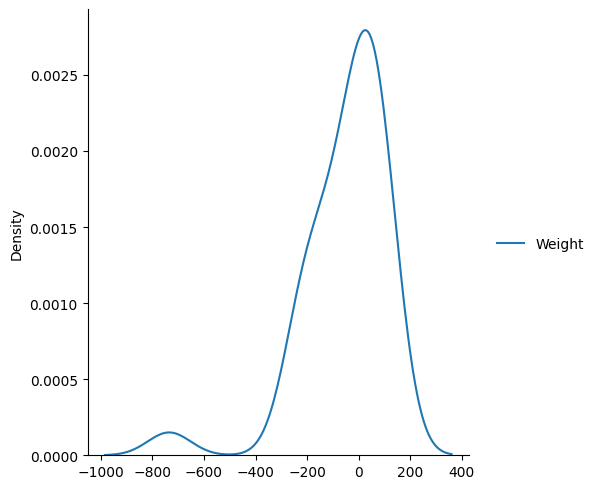

In [66]:
import seaborn as sns
sns.displot(reg_predict-y_test, kind = "kde")

In [67]:
from sklearn.metrics import r2_score

In [68]:
score=r2_score(reg_predict,y_test)

In [69]:
score

0.7349295735627863

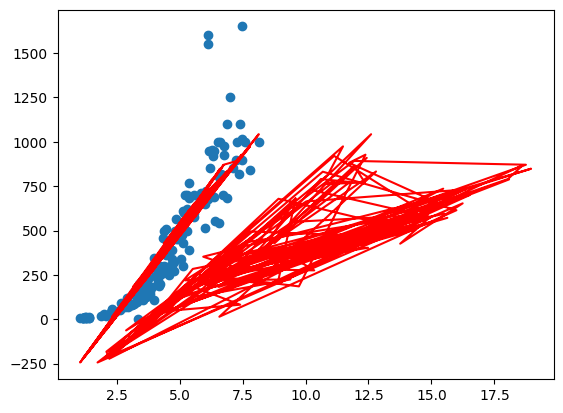

In [81]:
plt.scatter(df['Width'],df['Weight'])
plt.plot(x_train,reg.predict(x_train),color="red")
